In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=100
pd.options.display.max_rows = 100
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Detect outliers
num_clmn=df.select_dtypes(include=['float64','int64']).columns
outliers_dic={}
for column in num_clmn:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR
  outliers=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
  outliers_dic[column]=outliers
for column, outliers in outliers_dic.items():
    print(f"{column}: {len(outliers)} outliers")

age: 0 outliers
bmi: 9 outliers
children: 0 outliers
charges: 139 outliers


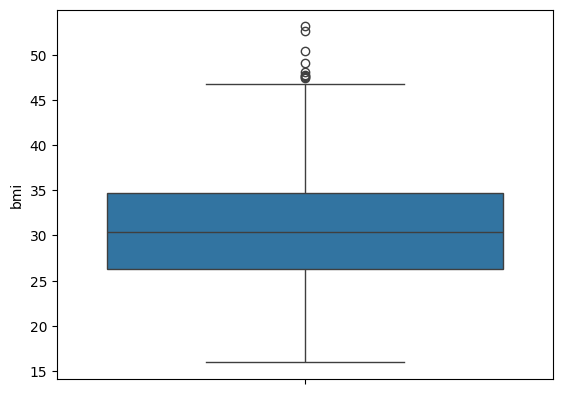

In [9]:
#outliers detection for BMI using Boxplot
sns.boxplot(df['bmi'])
plt.show()

In [14]:
#removing the outliers present in BMI column
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
outliers=df[(df['bmi']>upper_limit)|(df['bmi']<lower_limit)]


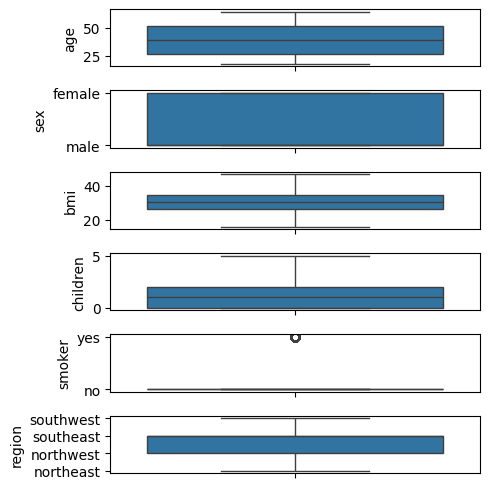

In [15]:
fig,axs=plt.subplots(6,figsize=(5,5))
plt1=sns.boxplot(df['age'],ax=axs[0])
plt2=sns.boxplot(df['sex'],ax=axs[1])
plt3=sns.boxplot(df['bmi'],ax=axs[2])
plt4=sns.boxplot(df['children'],ax=axs[3])
plt5=sns.boxplot(df['smoker'],ax=axs[4])
plt6=sns.boxplot(df['region'],ax=axs[5])
plt.tight_layout()

In [16]:
#shows if duplicate rows are present
duplicate=df[df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [17]:
#changing categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
df2=df.copy()
#sex
le = LabelEncoder()#initilizing the labelencoder
df2.sex = le.fit_transform(df2.sex)#transforms it to dataframe
# smoker or not
df2.smoker = le.fit_transform(df2.smoker)
#region
df2.region = le.fit_transform(df2.region)

In [18]:
#after label encoding
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [19]:
#Initialing the features and Target variable
y=df2['charges']
x=df2.drop('charges',axis=1)
#Initializing the Linear regression model from sklearn
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_test_pred=lr.predict(x_test)
#print(y_test_pred)
print(lr.score(x_test,y_test))#r square value

0.7670125399116677


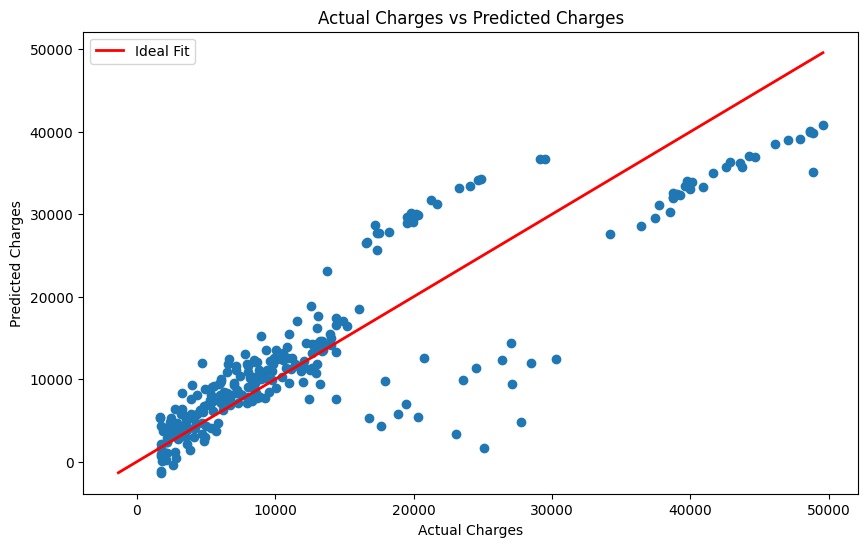

In [35]:
#plot of actual charges vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
max_value = max(max(y_test), max(y_test_pred))
min_value = min(min(y_test), min(y_test_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')
plt.legend()
plt.show()

In [21]:
#predict charges of a new customer
new_cs=[18,1,33.770,1,0,2]
y_test_pred=lr.predict([new_cs])
y_test_pred

array([3680.71830746])

In [29]:
new_cs=[18,1,33.770,1,0]
y_test_pred1=lr.predict([new_cs])
y_test_pred1

array([3830.78715835])

In [30]:
#calculating r-square
r2=r2_score(y_test,y_test_pred)
r2

0.7682775244166569

In [31]:
#calculating absolte mean error
mae=mean_absolute_error(y_test,y_test_pred)
mae

4066.647176907587

In [32]:
#calculating RMS
rms=np.sqrt(mean_squared_error(y_test,y_test_pred))
rms

5858.845402494757